In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv(r"C:\Users\shres\OneDrive\Desktop\Data Science\Classifications\HeartDiseaseTrain-Test.csv")

In [5]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0


In [6]:
df.rename(columns={'chest_pain_type' : 'cp_type'}, inplace = True)
df.rename(columns={'resting_blood_pressure' : 'rest_bp'}, inplace = True)
df.rename(columns={'cholestoral' : 'chol'}, inplace = True)
df.rename(columns={'fasting_blood_sugar' : 'fbs'}, inplace = True)
df.rename(columns={'Max_heart_rate' : 'max_hr'}, inplace = True)
df.rename(columns={'exercise_induced_angina' : 'ex_ang'}, inplace = True)
df.rename(columns={'vessels_colored_by_flourosopy' : 'vcf'}, inplace = True)
df.rename(columns={'thalassemia' : 'thal'}, inplace = True)

In [7]:
df.head()

,age,sex,cp_type,rest_bp,chol,fbs,rest_ecg,max_hr,ex_ang,oldpeak,slope,vcf,thal,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0


In [8]:
print(df['sex'].unique())
print(df['cp_type'].unique())
print(df['fbs'].unique())
print(df['rest_ecg'].unique())
print(df['slope'].unique())
print(df['vcf'].unique())
print(df['thal'].unique())
print(df['target'].unique())

['Male' 'Female']
['Typical angina' 'Atypical angina' 'Non-anginal pain' 'Asymptomatic']
['Lower than 120 mg/ml' 'Greater than 120 mg/ml']
['ST-T wave abnormality' 'Normal' 'Left ventricular hypertrophy']
['Downsloping' 'Upsloping' 'Flat']
['Two' 'Zero' 'One' 'Three' 'Four']
['Reversable Defect' 'Fixed Defect' 'Normal' 'No']
[0 1]


In [9]:
df['sex'] = df['sex'].replace({'Male': 0, 'Female': 1})
df['cp_type'] = df['cp_type'].replace({'Typical angina' : 0 , 'Atypical angina' : 1, 'Non-anginal pain' : 2, 'Asymptomatic' : 3})
df['fbs'] = df['fbs'].replace({'Greater than 120 mg/ml' : 1, 'Lower than 120 mg/ml' : 0})
df['rest_ecg'] = df['rest_ecg'].replace({'ST-T wave abnormality' : 0, 'Normal' : 1, 'Left ventricular hypertrophy' : 2})
df['slope'] = df['slope'].replace({'Downsloping' : 0, 'Upsloping' : 1, 'Flat' : 2})
df['vcf'] = df['vcf'].replace({'Zero' : 0, 'One' : 1, 'Two' : 2, 'Three' : 3, 'Four' : 4})
df['thal'] = df['thal'].replace({'No' : 0, 'Normal' : 1, 'Fixed Defect' : 2, 'Reversable Defect' : 3})

In [10]:
df.head()

,age,sex,cp_type,rest_bp,chol,fbs,rest_ecg,max_hr,ex_ang,oldpeak,slope,vcf,thal,target
0,52,0,0,125,212,0,0,168,No,1.0,0,2,3,0
1,53,0,0,140,203,1,1,155,Yes,3.1,1,0,3,0
2,70,0,0,145,174,0,0,125,Yes,2.6,1,0,3,0
3,61,0,0,148,203,0,0,161,No,0.0,0,1,3,0
4,62,1,0,138,294,1,0,106,No,1.9,2,3,2,0


In [11]:
print(df['sex'].unique())
print(df['cp_type'].unique())
print(df['fbs'].unique())
print(df['rest_ecg'].unique())
print(df['slope'].unique())
print(df['vcf'].unique())
print(df['thal'].unique())

[0 1]
[0 1 2 3]
[0 1]
[0 1 2]
[0 1 2]
[2 0 1 3 4]
[3 2 1 0]


Data :

=> age : age in years

=> sex : Male - 0, Female - 1

=> cp_type : chest pain type : Typical angina : 0 , Atypical angina : 1, Non-anginal pain : 2, Asymptomatic : 3

=> rest_bp : resting blood pressure

=> chol : cholestrol

=> fbs : fasting_blood_sugar : Greater than 120 mg/ml : 1, Lower than 120 mg/ml : 0

=> rest_ecg : ST-T wave abnormality : 0, Normal : 1, Left ventricular hypertrophy : 2

=> max_hr : Max_heart_rate

=> ex_ang : exercise_induced_angina : 1 = yes, 0 = no

=> oldpeak

=> slope : Downsloping : 0, Upsloping : 1, Flat : 2

=> vcf : vessels_colored_by_flourosopy 

=> thal : thalassemia : No : 0, Normal : 1, Fixed Defect : 2, Reversable Defect : 3

=> target : has disease or not : yes = 1, No = 0

Data Exploration : 

In [12]:
df.target.value_counts()

1    526
0    499
Name: target, dtype: int64

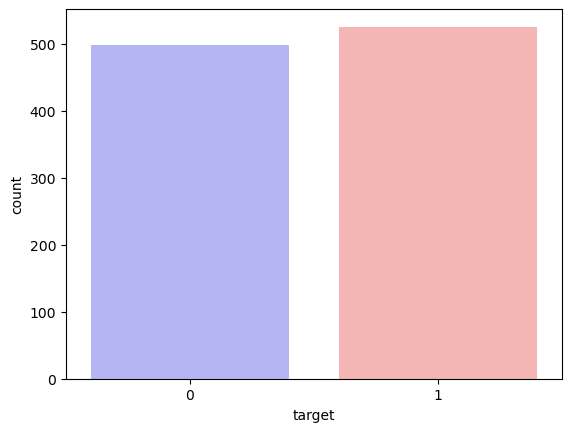

In [13]:
sns.countplot(x='target', data=df, palette='bwr')
plt.show()

In [14]:
countNoDisease = len(df[df.target == 0])
countHasDisease = len(df[df.target == 1])
print("Percentage of Patients who doesn't have heart disease : {:.2f}%".format((countNoDisease/(len(df.target))*100)))
print("Percentage of Patients who have heart disease : {:.2f}%".format((countHasDisease/(len(df.target))*100)))

Percentage of Patients who doesn't have heart disease : 48.68%
Percentage of Patients who have heart disease : 51.32%


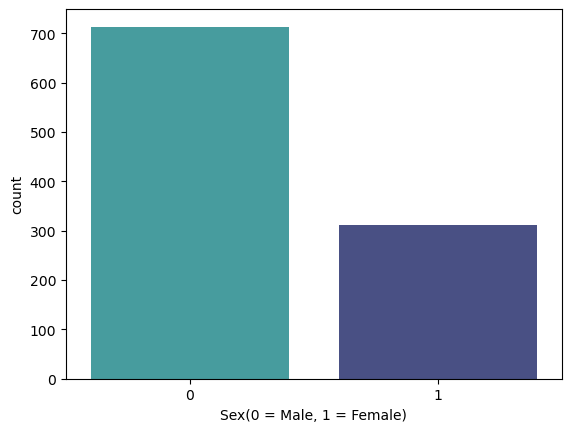

In [15]:
sns.countplot(x='sex', data=df, palette="mako_r")
plt.xlabel("Sex(0 = Male, 1 = Female)")
plt.show()

In [16]:
countFemale = len(df[df.sex == 1])
countMale = len(df[df.sex == 0])
print("Percentage of Female Patients : {:.2f}%".format((countFemale/(len(df.sex))*100)))
print("Percentage of Male Patients : {:.2f}%".format(countMale/(len(df.sex))*100))

Percentage of Female Patients : 30.44%
Percentage of Male Patients : 69.56%


In [17]:
df.groupby('target').mean()

,age,sex,cp_type,rest_bp,chol,fbs,rest_ecg,max_hr,oldpeak,slope,vcf,thal
target,,,,,,,,,,,,
0,56.569138,0.172345,0.482966,134.106212,251.292585,0.164329,0.615230,139.130261,1.600200,1.390782,1.158317,2.539078
1,52.408745,0.429658,1.378327,129.245247,240.979087,0.134981,0.418251,158.585551,0.569962,0.653992,0.370722,2.119772


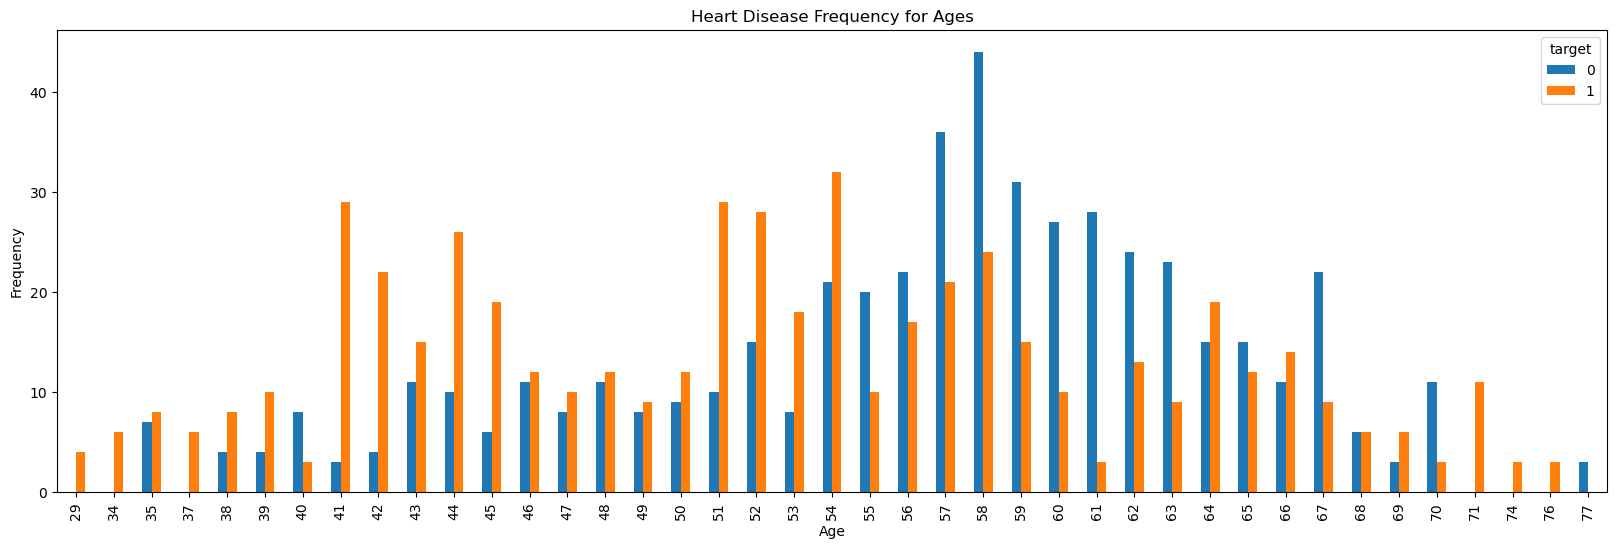

In [18]:
pd.crosstab(df.age, df.target).plot(kind = "bar", figsize = (20, 6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

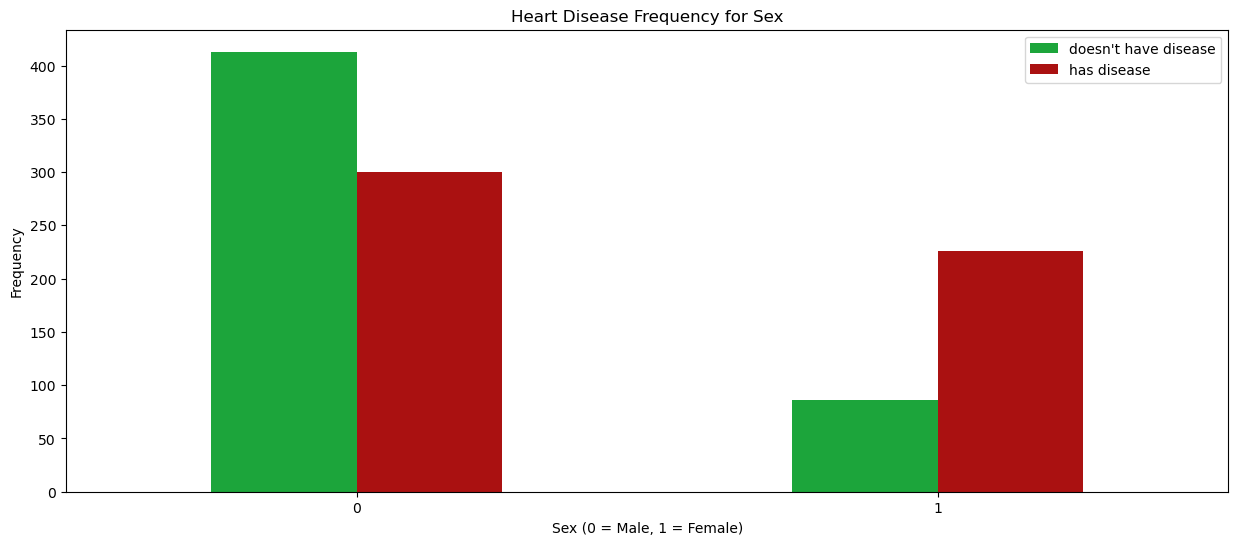

In [19]:
pd.crosstab(df.sex, df.target).plot(kind = "bar", figsize = (15, 6), color=['#1CA53B', '#AA1111'])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Male, 1 = Female)')
plt.xticks(rotation = 0)
plt.legend(["doesn't have disease", "has disease"])
plt.ylabel('Frequency')
plt.show()

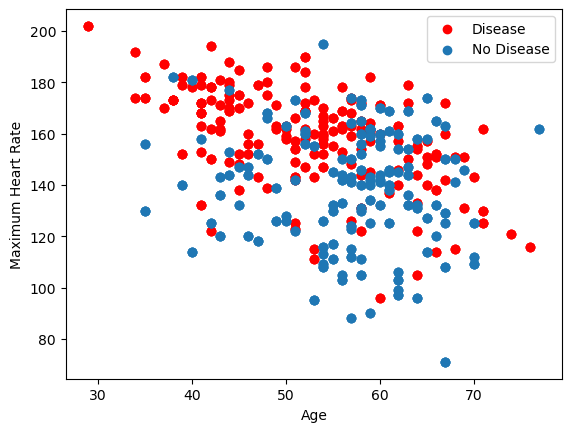

In [20]:
plt.scatter(x=df.age[df.target==1], y=df.max_hr[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.max_hr[(df.target==0)])
plt.legend(["Disease", "No Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

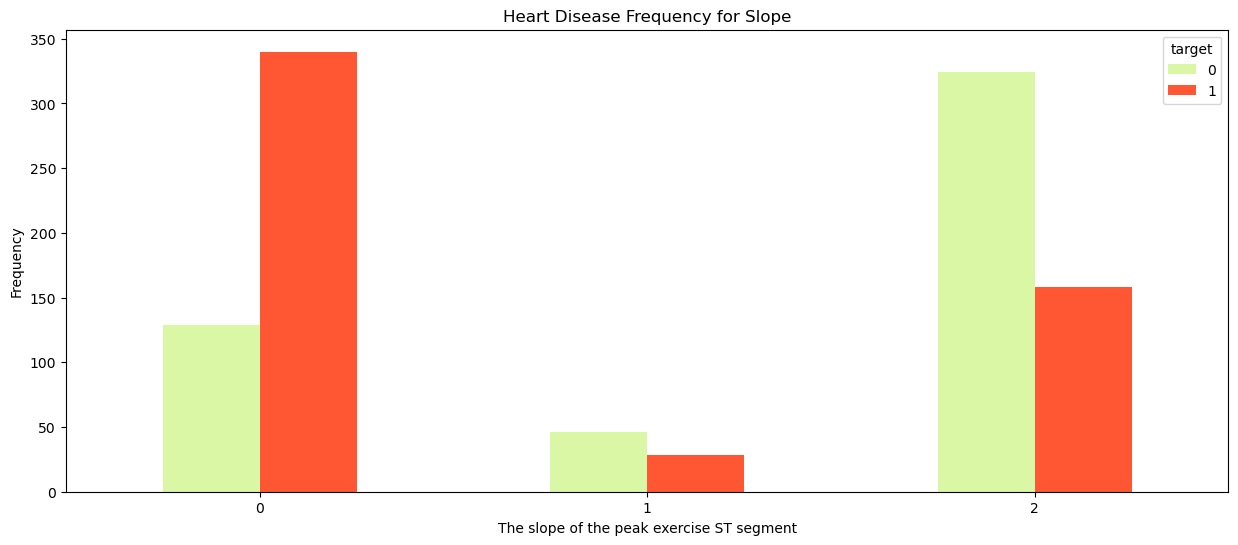

In [21]:
pd.crosstab(df.slope, df.target).plot(kind="bar", figsize=(15, 6), color=['#DAF7A6', '#FF5733'])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The slope of the peak exercise ST segment')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

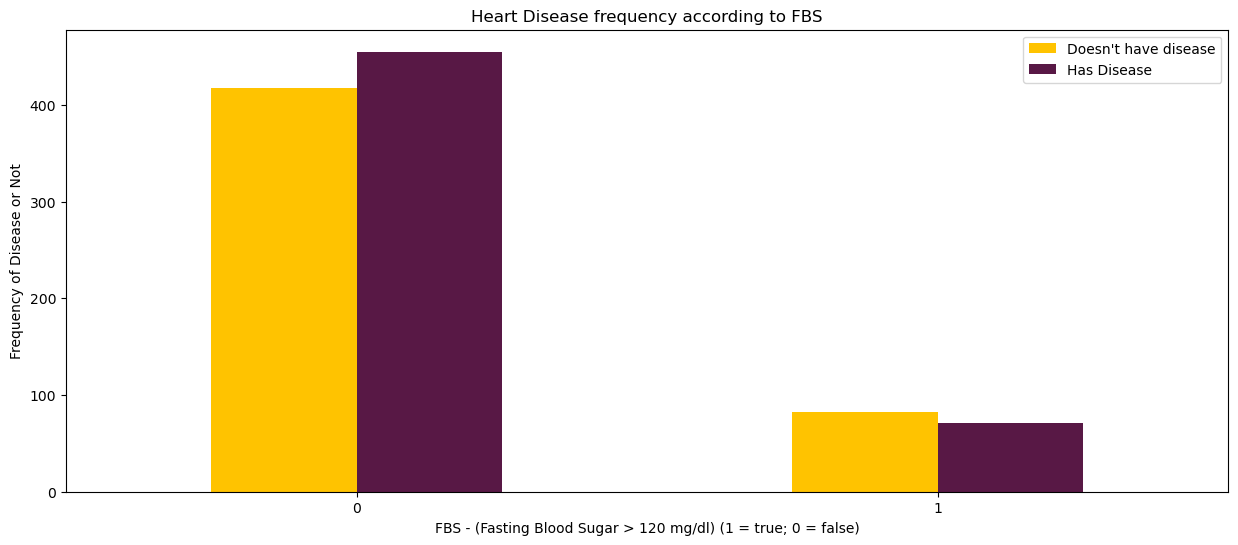

In [22]:
pd.crosstab(df.fbs, df.target).plot(kind="bar", figsize=(15, 6), color=['#FFC300', '#581845'])
plt.title('Heart Disease frequency according to FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Doesn't have disease", "Has Disease"])
plt.ylabel("Frequency of Disease or Not")
plt.show()

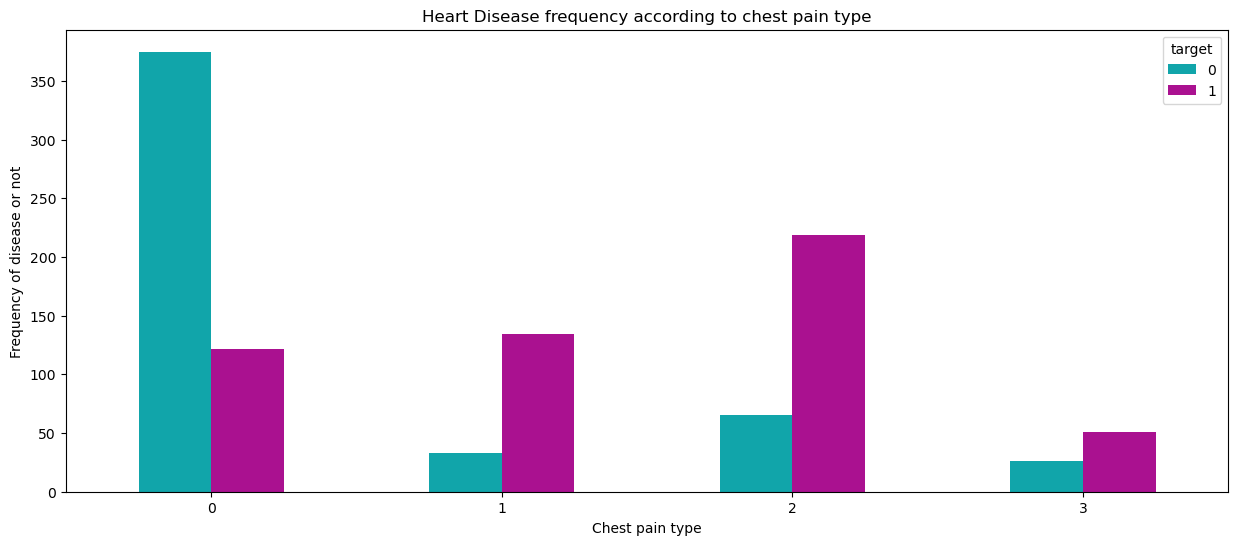

In [23]:
pd.crosstab(df.cp_type, df.target).plot(kind="bar", figsize=(15,6), color=['#11A5AA', '#AA1190'])
plt.title('Heart Disease frequency according to chest pain type')
plt.xlabel('Chest pain type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of disease or not')
plt.show()

Creating Dummy Variables:

Since 'cp_type', 'thal', 'slope' are categorical variables.

In [24]:
a = pd.get_dummies(df['cp_type'], prefix = "cp")
b = pd.get_dummies(df['thal'], prefix = "thal")
c = pd.get_dummies(df['slope'], prefix = "slope")

In [25]:
frames = [df, a, b, c]
df = pd.concat(frames, axis = 1)
df.head()

,age,sex,cp_type,rest_bp,chol,fbs,rest_ecg,max_hr,ex_ang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,52,0,0,125,212,0,0,168,No,1.0,...,0,0,0,0,0,0,1,1,0,0
1,53,0,0,140,203,1,1,155,Yes,3.1,...,0,0,0,0,0,0,1,0,1,0
2,70,0,0,145,174,0,0,125,Yes,2.6,...,0,0,0,0,0,0,1,0,1,0
3,61,0,0,148,203,0,0,161,No,0.0,...,0,0,0,0,0,0,1,1,0,0
4,62,1,0,138,294,1,0,106,No,1.9,...,0,0,0,0,0,1,0,0,0,1


In [26]:
df = df.drop(columns = ['cp_type', 'thal', 'slope'])

In [27]:
df.head()

,age,sex,rest_bp,chol,fbs,rest_ecg,max_hr,ex_ang,oldpeak,vcf,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,52,0,125,212,0,0,168,No,1.0,2,...,0,0,0,0,0,0,1,1,0,0
1,53,0,140,203,1,1,155,Yes,3.1,0,...,0,0,0,0,0,0,1,0,1,0
2,70,0,145,174,0,0,125,Yes,2.6,0,...,0,0,0,0,0,0,1,0,1,0
3,61,0,148,203,0,0,161,No,0.0,1,...,0,0,0,0,0,0,1,1,0,0
4,62,1,138,294,1,0,106,No,1.9,3,...,0,0,0,0,0,1,0,0,0,1


In [28]:
df['ex_ang'] = df['ex_ang'].replace({'Yes' : 1, 'No' : 0})

In [29]:
accuracies ={}

.

Logistic Regression:

In [30]:
y = df.target.values
x_data = df.drop(['target'], axis=1)

In [31]:
x = (x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data)).values

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [33]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [34]:
acc = lr.score(x_test, y_test)*100

In [35]:
accuracies['logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 85.85%


.

K-Nearest Neighbour (KNN) Classification:

In [36]:
x_train_arr = x_train.to_numpy()
x_test_arr = x_test.to_numpy()

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(x_train_arr, y_train)

KNeighborsClassifier(n_neighbors=2)

In [38]:
prediction = knn.predict(x_test_arr)

In [39]:
print("{} NN score : {:.2f}%".format(2, knn.score(x_test_arr, y_test)*100))

2 NN score : 100.00%


Accuracy 100% represents overfitting.

In [40]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train_arr, y_train)

KNeighborsClassifier()

In [41]:
prediction = knn.predict(x_test_arr)

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_arr)
x_test_scaled = scaler.transform(x_test_arr)

# Now, fit the model on scaled data
knn.fit(x_train_scaled, y_train)
prediction = knn.predict(x_test_scaled)

In [43]:
print("{} NN score : {:.2f}%".format(5, knn.score(x_test_scaled, y_test)*100))

5 NN score : 89.76%


In [44]:
acc = knn.score(x_test_scaled, y_test)*100
accuracies['KNN'] = acc

.

SVM (SUPPORT VECTOR MACHINE) Algorithm

In [45]:
from sklearn.svm import SVC

In [46]:
svm = SVC(kernel='linear',random_state = 1)
svm.fit(x_train, y_train)

SVC(kernel='linear', random_state=1)

In [47]:
acc = svm.score(x_test, y_test)*100

In [48]:
accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm : {:.2f}%".format(acc))

Test Accuracy of SVM Algorithm : 86.34%


.

Naive Bayes Algorithm : 

In [49]:
from sklearn.naive_bayes import GaussianNB

In [50]:
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

In [51]:
acc = nb.score(x_test, y_test)*100
accuracies['Naive Bayes'] = acc
print("Accuracy of Naive Bayes: {:.2f}%".format(acc))

Accuracy of Naive Bayes: 88.29%


.

Decision Tree Algorithm

In [52]:
from sklearn.tree import DecisionTreeClassifier


In [53]:
dtc = DecisionTreeClassifier(max_depth = 5)
dtc.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [54]:
acc = dtc.score(x_test, y_test)*100
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy {:.2f}%".format(acc))

Decision Tree Test Accuracy 87.80%


.

Random Forest Classification

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
rf = RandomForestClassifier(n_estimators = 1000, max_depth=3, random_state = 1)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=1000, random_state=1)

In [57]:
acc = rf.score(x_test, y_test)*100
accuracies['Random Forest'] = acc
print("Random Forest Algorithm score : {:.2f}%".format(acc))

Random Forest Algorithm score : 89.27%


.

Comparing Models:

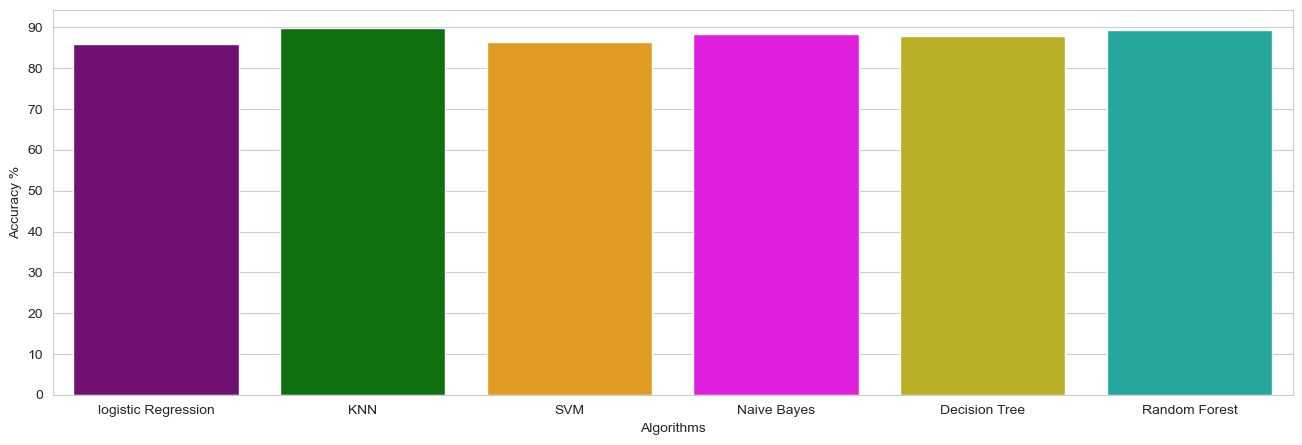

In [58]:
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

From out observations of different models for classification, we can say that all the models have good accuracy of classification.

But KNN Algorithm and Random Forest Classification gives the best classifications with an accuracy of 89%.

.

CONFUSION MATRIX

In [59]:
y_head_lr = lr.predict(x_test)
y_head_knn = knn.predict(x_test_scaled)
y_head_svm = svm.predict(x_test)
y_head_nb = nb.predict(x_test)
y_head_dtc = dtc.predict(x_test)
y_head_rf = rf.predict(x_test)

In [60]:
from sklearn.metrics import confusion_matrix

In [61]:
cm_lr = confusion_matrix(y_test,y_head_lr)
cm_knn = confusion_matrix(y_test,y_head_knn)
cm_svm = confusion_matrix(y_test,y_head_svm)
cm_nb = confusion_matrix(y_test,y_head_nb)
cm_dtc = confusion_matrix(y_test,y_head_dtc)
cm_rf = confusion_matrix(y_test,y_head_rf)

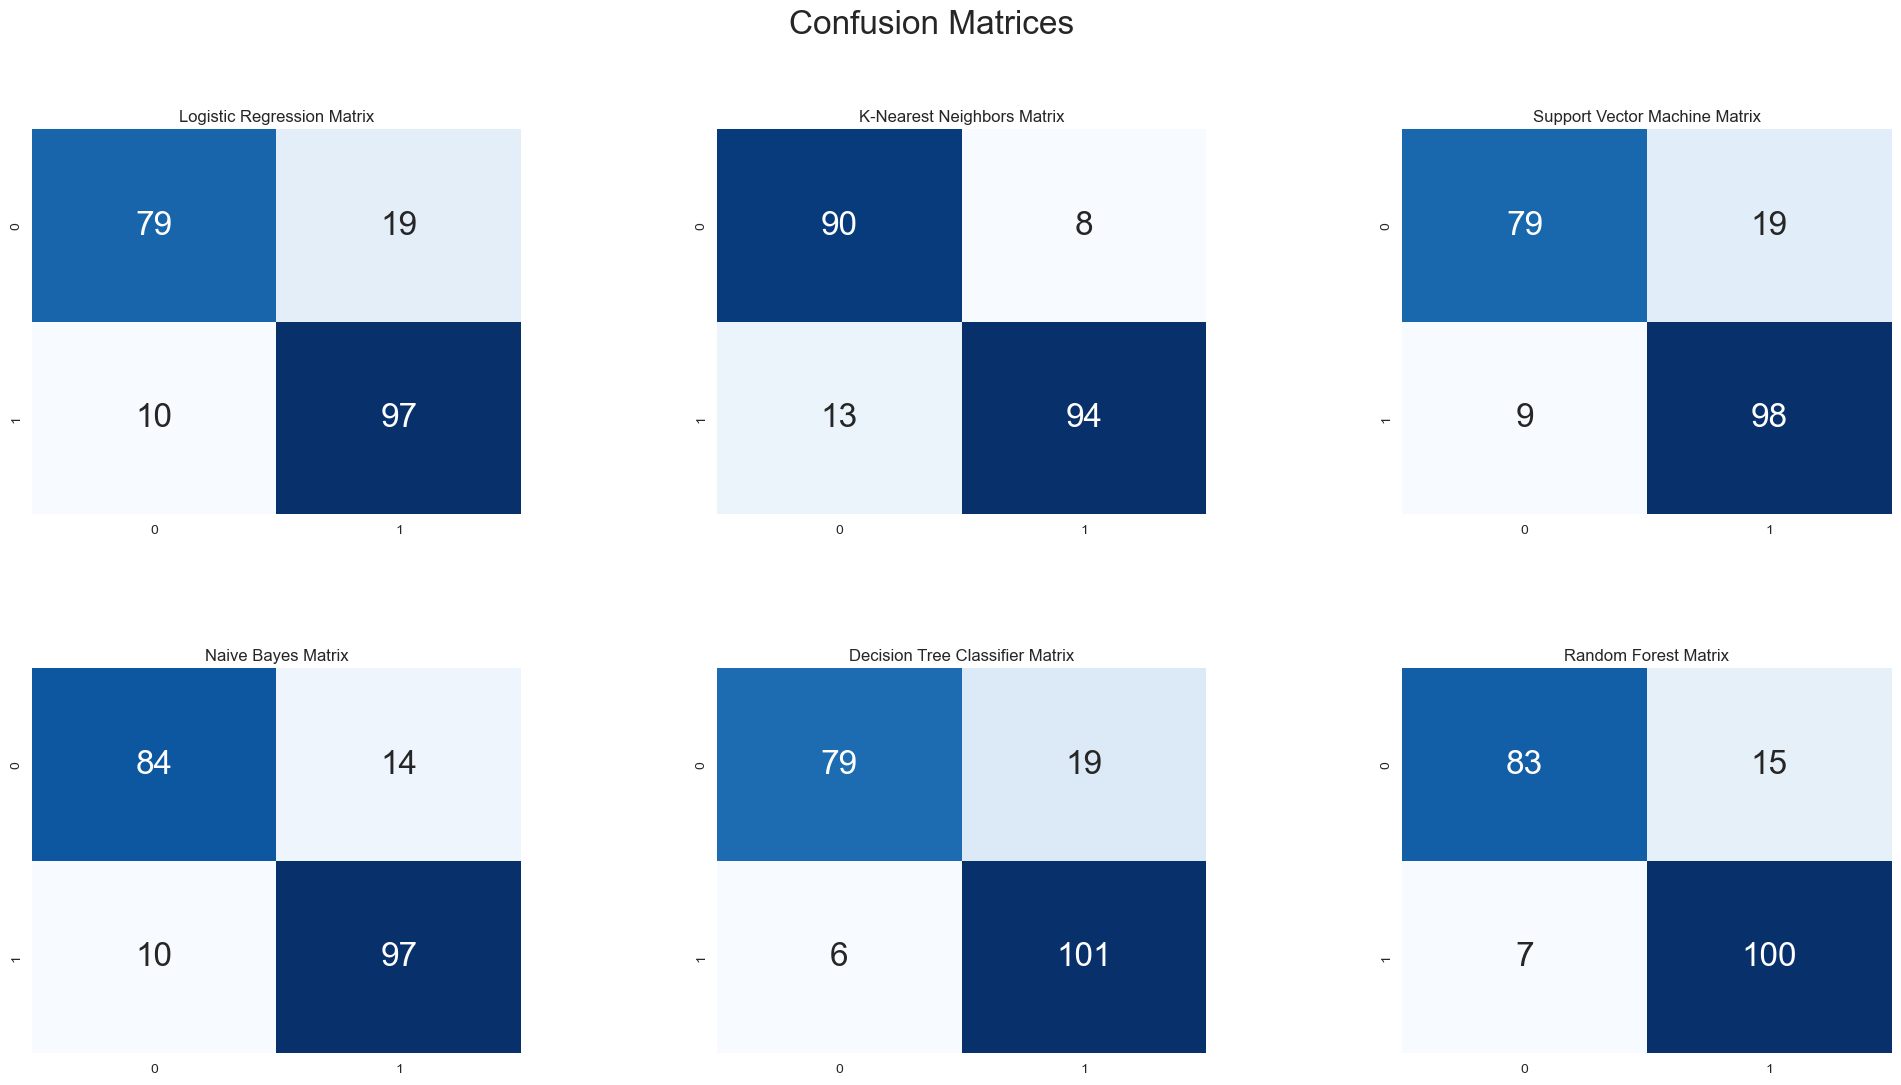

In [62]:
plt.figure(figsize=(24, 12))

plt.suptitle("Confusion Matrices", fontsize = 24)
plt.subplots_adjust(wspace = 0.4, hspace = 0.4)

plt.subplot(2, 3, 1)
plt.title("Logistic Regression Matrix")
sns.heatmap(cm_lr, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size" : 24})

plt.subplot(2,3,2)
plt.title("K-Nearest Neighbors Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Support Vector Machine Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Naive Bayes Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,6)
plt.title("Random Forest Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()